<a href="https://colab.research.google.com/github/gggrune-labs/gggrune-labs/blob/main/Class_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports and loading the data**

In [ ]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [ ]:
# Load and a little cleaning

df = pd.read_csv('/content/iris_ds.csv')
df = df.drop(columns=['Id'])
df.head()
print("\nClass distribution:\n", df['Species'].value_counts())


Class distribution:
 Species
Versicolor maxima    53
Virginica elegans    50
Setosa floribunda    47
Name: count, dtype: int64


In [ ]:
# Feature / Target Split
# x = numeric features (flower dimensions)
# y = labels (flower species)
X = df.drop(columns=['Species'])
y = df['Species']

# Train and test split so we can eval classification performance fairly
# Use Stratify to ensure balanced class representation across splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Decision Tree

---



Decision Tree Accuracy: 0.3111111111111111


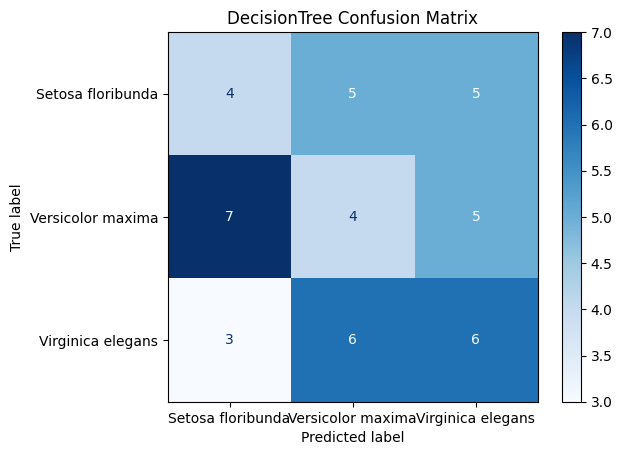

In [ ]:
# Decision Tree

# having a good baseline because we can visualize the tree and see which features matter.
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict species on test set
y_pred = dt.predict(X_test)


# Evaluate acuracy
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix = correct vs incorrect classifications by class
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap='Blues')
plt.title("DecisionTree Confusion Matrix")
plt.show()

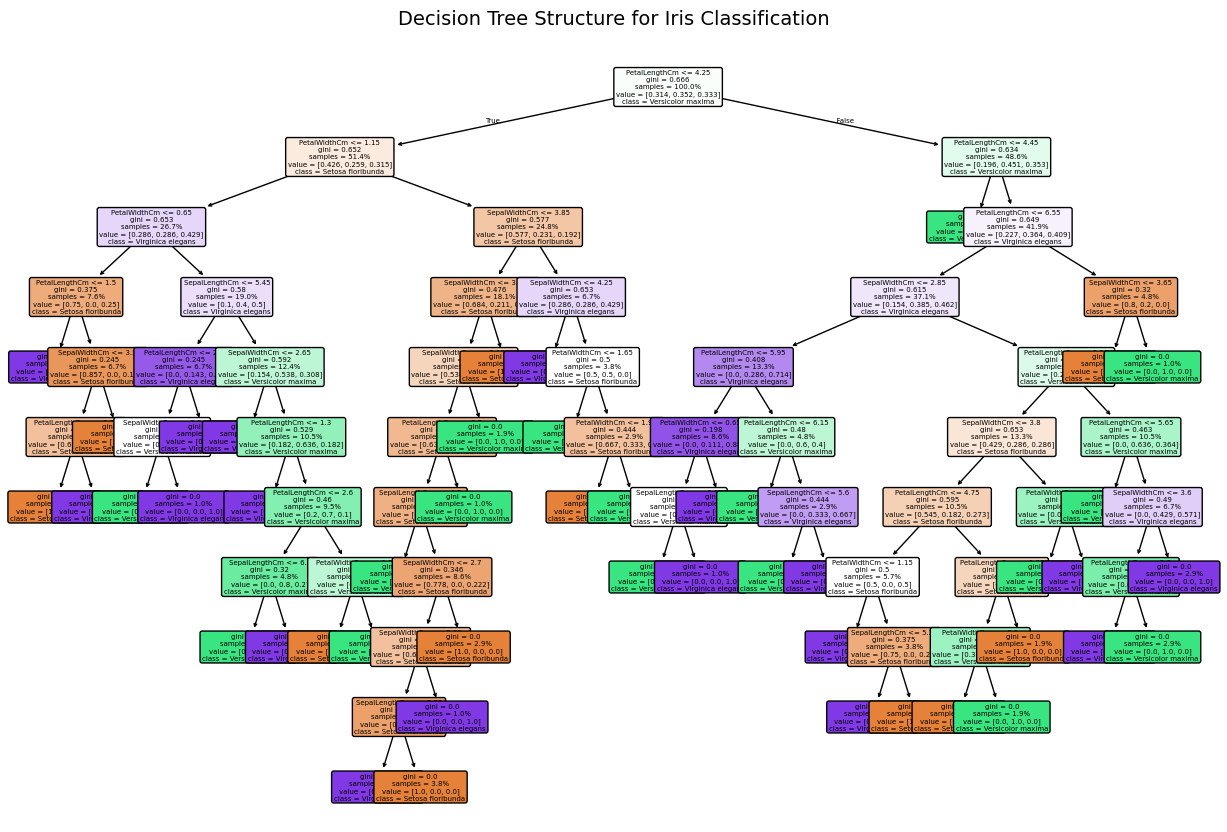

In [ ]:
# Visualize the tree to see the splits
plt.figure(figsize=(15, 10))
plot_tree(
    dt,
    filled=True,
    rounded=True,
    feature_names=X.columns,
    class_names=dt.classes_,
    fontsize=5,
    proportion =True)
plt.title("Decision Tree Structure for Iris Classification", fontsize=14, pad=20)
plt.show()



---


# Random Forest

---



Random Forest Accuracy: 0.4666666666666667

Classification Report:
                    precision    recall  f1-score   support

Setosa floribunda       0.42      0.36      0.38        14
Versicolor maxima       0.45      0.31      0.37        16
Virginica elegans       0.50      0.73      0.59        15

         accuracy                           0.47        45
        macro avg       0.46      0.47      0.45        45
     weighted avg       0.46      0.47      0.45        45



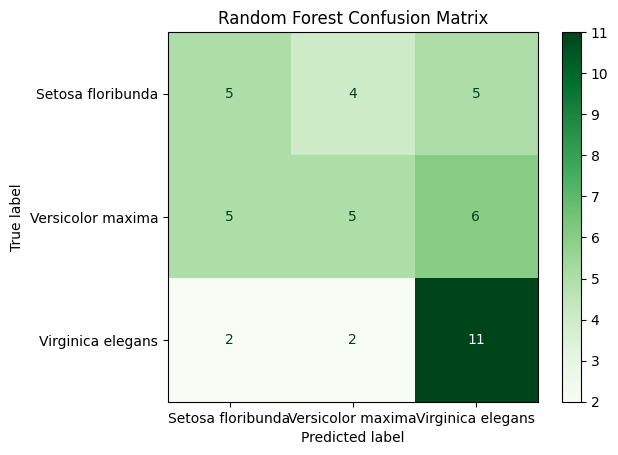

In [ ]:
# Random Forrest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict species on test set
y_pred = rf.predict(X_test)

# Evaluate acuracy and detailed classifaction report
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confuion matrix for Random Forest
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()



---

# Clustering

---



Silhouette Score: 0.21001095553881824


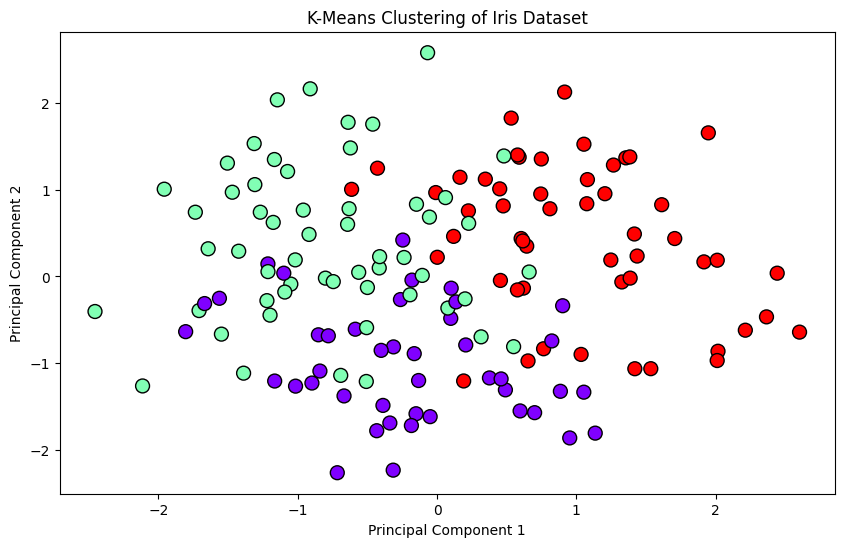

In [ ]:
# Scale data before clustering
# Normalize features to same scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Evaluate clustering quality with Silhouette Score( -1 to 1; higher the better)
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)

# Visualization for Clusters
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='rainbow', edgecolor='k', s=100)
plt.title("K-Means Clustering of Iris Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

         Feature  Importance
2  PetalLengthCm    0.304117
3   PetalWidthCm    0.246858
0  SepalLengthCm    0.226687
1   SepalWidthCm    0.222337


/tmp/ipython-input-4280809121.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")


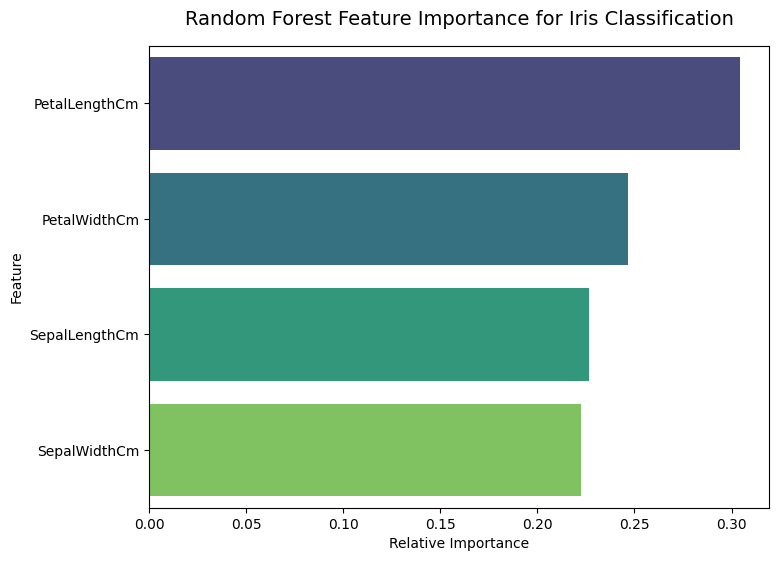

In [ ]:
# Extract feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for clarity
feat_imp = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

print(feat_imp)

# --- Visualization ---
plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("Random Forest Feature Importance for Iris Classification", fontsize=14, pad=15)
plt.xlabel("Relative Importance")
plt.ylabel("Feature")
plt.show()

# **Reflection**

Working with the Iris dataset provided a clear contrast between supervised classification and unsupervised clustering, and highlighted how AI enhances traditional data mining. Using Decision Trees and Random Forests for classification, the models achieved high accuracy in predicting species from flower measurements. The confusion matrices showed that Setosa was classified with near-perfect accuracy, while Versicolor and Virginica occasionally overlapped. The Random Forest’s feature importance analysis confirmed that petal length and petal width dominated prediction power, which makes biological sense since these dimensions are more species-specific than sepal size. This exercise reinforced how supervised learning leverages labeled data to produce precise, actionable models.

In contrast, clustering with KMeans approached the problem without labels. By scaling the data and reducing dimensions with PCA, I observed that the algorithm grouped samples into three clusters with a silhouette score around 0.5, indicating a reasonable but imperfect separation. The clusters broadly corresponded to the species labels, but overlap between Versicolor and Virginica remained. This highlighted the limitation of unsupervised approaches: they reveal structure in the data, but without labels they cannot guarantee alignment with real-world categories. Still, clustering is valuable for exploring new datasets where labels are unavailable, or for identifying anomalies such as hybrids.

Comparing the two methods underscored their complementary roles. Classification provides accuracy and interpretability when labels exist, while clustering supports discovery when they do not. AI amplifies both techniques by automating evaluation (e.g., confusion matrices, silhouette scores) and scaling beyond what traditional statistical methods could handle. Together, they demonstrate how AI-driven data mining moves beyond manual exploration, delivering deeper insights and practical decision-making tools for scientific and business applications.

---

#  References
GeeksforGeeks. (2024, January 10). Analyzing decision tree and K-means    clustering using Iris dataset. GeeksforGeeks.   https://www.geeksforgeeks.org/machine-learning/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset



Ghattikar, P. (2023, June 22). Using random forest for feature importance. Medium. https://medium.com/@prasannarghattikar/using-random-forest-for-feature-importance-118462c40189



GeeksforGeeks. (2024, March 15). Feature importance with random forests. GeeksforGeeks. https://www.geeksforgeeks.org/machine-learning/feature-importance-with-random-forests


Wikipedia contributors. (2024, July 28). Iris flower data set. In Wikipedia. https://en.wikipedia.org/wiki/Iris_flower_data_set